In [15]:
import main
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
np.set_printoptions(suppress=False)

In [70]:

def public_goods_fitness_function(state,alpha,r, epsilon):
    number_of_contributors = state.sum()
    big_bit =  r * alpha * number_of_contributors / len(state)
    payoff = np.array([big_bit - alpha*x for x in state])
    return 1 + (epsilon * payoff)

In [82]:
state_space = main.get_state_space(N=4,k=2)
r_values = np.linspace(1, 4, 2000)
alpha_values = np.linspace(0.5,6,2000)
one_coop_values = np.zeros(2000)
two_coop_values = np.zeros(2000)
three_coop_values = np.zeros(2000)
one_coop_values

array([0., 0., 0., ..., 0., 0., 0.], shape=(2000,))

In [84]:
k = 0
for r in r_values:

    transition_matrix = main.generate_transition_matrix(state_space = state_space, fitness_function=public_goods_fitness_function, r=r, alpha=2, epsilon = 0.2)
    
    probability_space = main.get_absorption_probabilities(
        transition_matrix=transition_matrix,
        state_space = state_space,
        exponent_coefficient=50
    )


    one_coop_values[k] = probability_space[1][3]

    two_coop_values[k] = probability_space[6][3]

    three_coop_values[k] = probability_space[13][3]


    k += 1

print(one_coop_values)
print(two_coop_values)
print(three_coop_values)

[0.11981936 0.11984546 0.11987154 ... 0.15596385 0.15597657 0.15598929]
[0.30829    0.30834247 0.3083949  ... 0.374569   0.37459018 0.37461136]
[0.59118312 0.59123983 0.5912965  ... 0.65589253 0.65591121 0.65592989]


<function matplotlib.pyplot.show(close=None, block=None)>

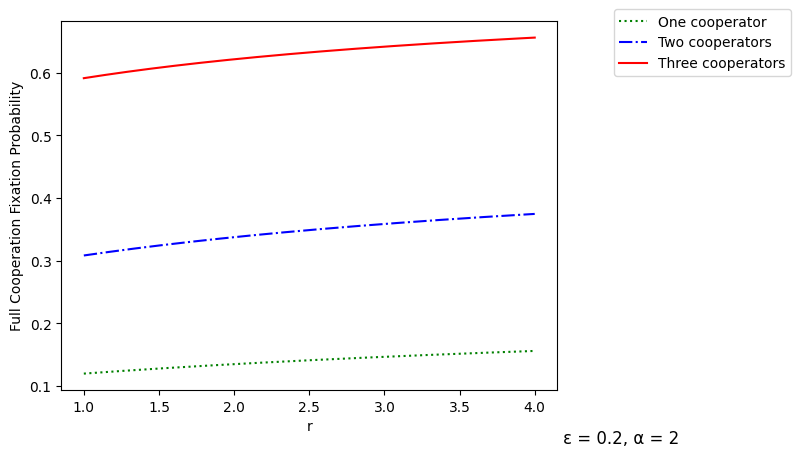

In [85]:
plt.plot(r_values, one_coop_values, color = 'green', label = 'One cooperator', linestyle = ':')

plt.plot(r_values, two_coop_values, color = 'blue', label = 'Two cooperators', linestyle = '-.')

plt.plot(r_values, three_coop_values, color = 'red', label = 'Three cooperators', linestyle = 'solid')

plt.xlabel("r")
plt.ylabel("Full Cooperation Fixation Probability")
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.figtext(1, 0, 'ε = 0.2, α = 2', wrap=True, horizontalalignment='center', fontsize=12)
plt.show

In [41]:
public_goods_fitness_function(state = np.array([1,0,1,0]), alpha = 4, r = 2, epsilon = 0.001)

array([1.000e-03, 4.001e+00, 1.000e-03, 4.001e+00])

In [86]:
k = 0
for alpha in alpha_values:

    transition_matrix = main.generate_transition_matrix(state_space = state_space, fitness_function=public_goods_fitness_function, r=2, alpha=alpha, epsilon = 0.2)
    
    probability_space = main.get_absorption_probabilities(
        transition_matrix=transition_matrix,
        state_space = state_space,
        exponent_coefficient=50
    )


    one_coop_values[k] = probability_space[1][3]

    two_coop_values[k] = probability_space[6][3]

    three_coop_values[k] = probability_space[13][3]


    k += 1

print(one_coop_values)
print(two_coop_values)
print(three_coop_values)

[0.21445859 0.21427922 0.21409998 ... 0.03431402 0.03427625 0.0342385 ]
[0.45183395 0.45158678 0.45133976 ... 0.17135825 0.17128723 0.17121626]
[0.71329217 0.71310078 0.71290948 ... 0.47272283 0.47265409 0.47258538]


<function matplotlib.pyplot.show(close=None, block=None)>

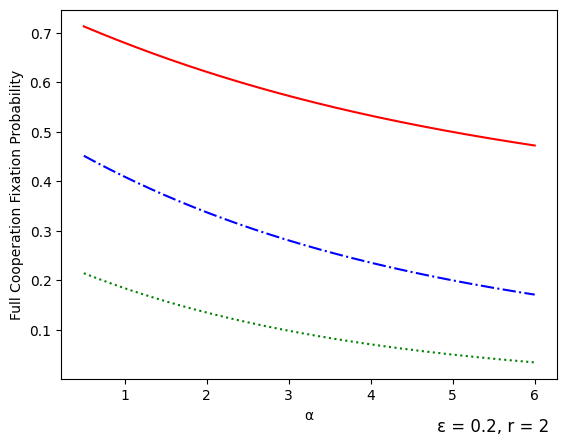

In [87]:
plt.plot(alpha_values, one_coop_values, color = 'green', label = 'One cooperator', linestyle = ':')

plt.plot(alpha_values, two_coop_values, color = 'blue', label = 'Two cooperators', linestyle = '-.')

plt.plot(alpha_values, three_coop_values, color = 'red', label = 'Three cooperators', linestyle = 'solid')

plt.xlabel("α")
plt.ylabel("Full Cooperation Fixation Probability")
plt.figtext(0.8, 0, 'ε = 0.2, r = 2', wrap=True, horizontalalignment='center', fontsize=12)
plt.show